In [44]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q wordcloud

In [18]:
# load the dataset
steam_description = pd.read_csv('../raw_data/steam_description_data.csv')

# Explore the data

In [19]:
steam_description.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [20]:
# check for missing values
steam_description.isna().sum()

steam_appid             0
detailed_description    0
about_the_game          0
short_description       0
dtype: int64

In [21]:
# check for duplicates
steam_description.duplicated().sum()

0

In [22]:
# columns 
steam_description.columns

Index(['steam_appid', 'detailed_description', 'about_the_game',
       'short_description'],
      dtype='object')

In [23]:
# infos
steam_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27334 non-null  int64 
 1   detailed_description  27334 non-null  object
 2   about_the_game        27334 non-null  object
 3   short_description     27334 non-null  object
dtypes: int64(1), object(3)
memory usage: 854.3+ KB


# Steam Description Analysis

There are 3 description columns in this table.

`detailed_description`, `about_the_game` and `short_description` are mostly identical.

## NLP to `short_description`

In [24]:
# strip html
import re
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: re.sub('<[^<]+?>', '', x))
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: x.replace('&quot', '').replace('\r\n', ''))
steam_description['short_description'].head()

0    Play the world's number 1 online action game. ...
1    One of the most popular online action games of...
2    Enlist in an intense brand of Axis vs. Allied ...
3    Enjoy fast-paced multiplayer gaming with Death...
4    Return to the Black Mesa Research Facility as ...
Name: short_description, dtype: object

In [25]:
# convert to lowercase
steam_description['short_description'] = steam_description['short_description'].apply(lambda x: x.lower())
steam_description['short_description'].head()

0    play the world's number 1 online action game. ...
1    one of the most popular online action games of...
2    enlist in an intense brand of axis vs. allied ...
3    enjoy fast-paced multiplayer gaming with death...
4    return to the black mesa research facility as ...
Name: short_description, dtype: object

In [28]:
# vectorize the words (top 100 with highest frequency)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', min_df = 5, max_features = 100)
cv.fit(steam_description['short_description'])
short_des_transformed = cv.transform(steam_description['short_description'])

In [30]:
# extract the information and put it in a dataframe
short_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = short_des_transformed.toarray())
short_des_vectorized.head()

,2d,3d,action,adventure,amp,arcade,based,battle,best,build,...,turn,unique,use,using,virtual,vr,war,way,weapons,world
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# count the occurrence of each word (token)
tokens = short_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game         12407
world         5216
new           2959
play          2856
adventure     2587
             ...  
challenge      637
single         625
shoot          620
epic           605
love           591
Length: 100, dtype: int64

<AxesSubplot:>

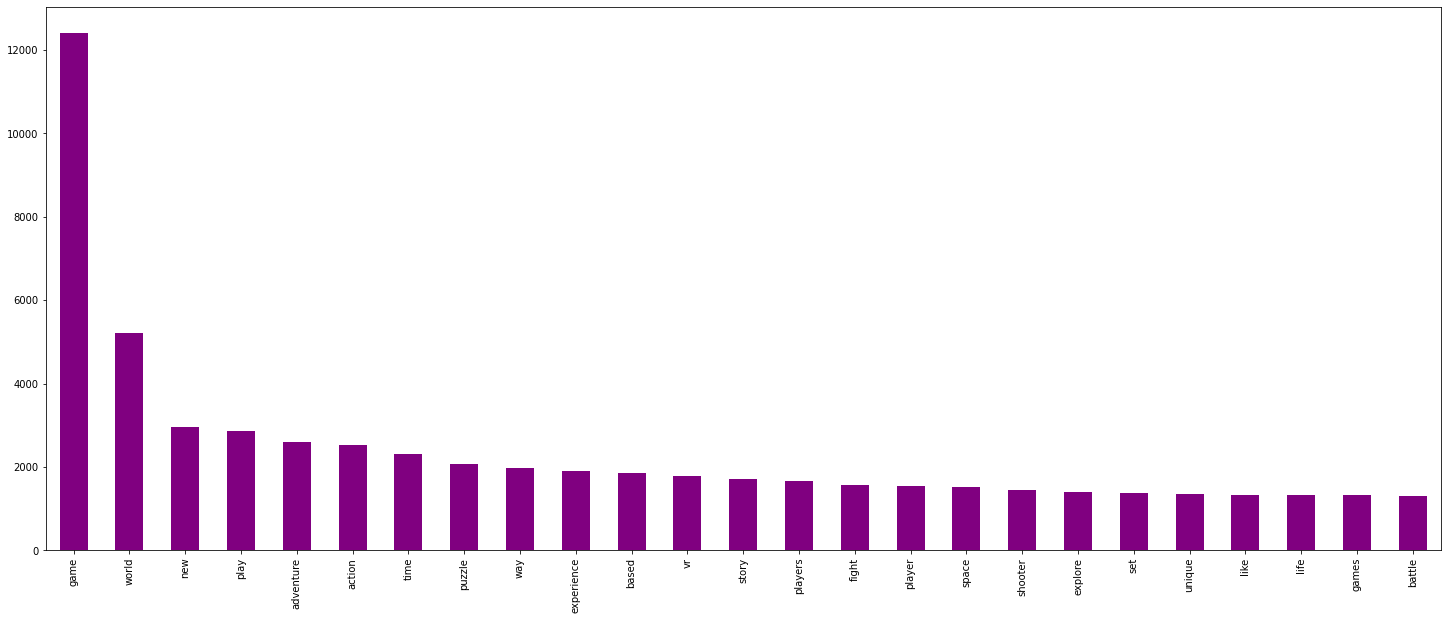

In [66]:
tokens.head(25).plot(kind='bar',figsize=(25,10), color='purple')

In [35]:
# join the tokens into one string
tokens_str = ' '.join(tokens.index)
tokens_str

'game world new play adventure action time puzzle way experience based vr story players fight player space shooter explore set unique like life games battle levels enemies rpg different classic strategy help make arcade fast build platformer use multiplayer friends person puzzles survive control style war fun save real combat gameplay weapons 2d city survival turn journey 3d online paced need virtual simple just escape create evil elements old mysterious collect dark challenging level skills power best horror series solve inspired monsters try using team amp fantasy reality discover characters place free open high role challenge single shoot epic love'

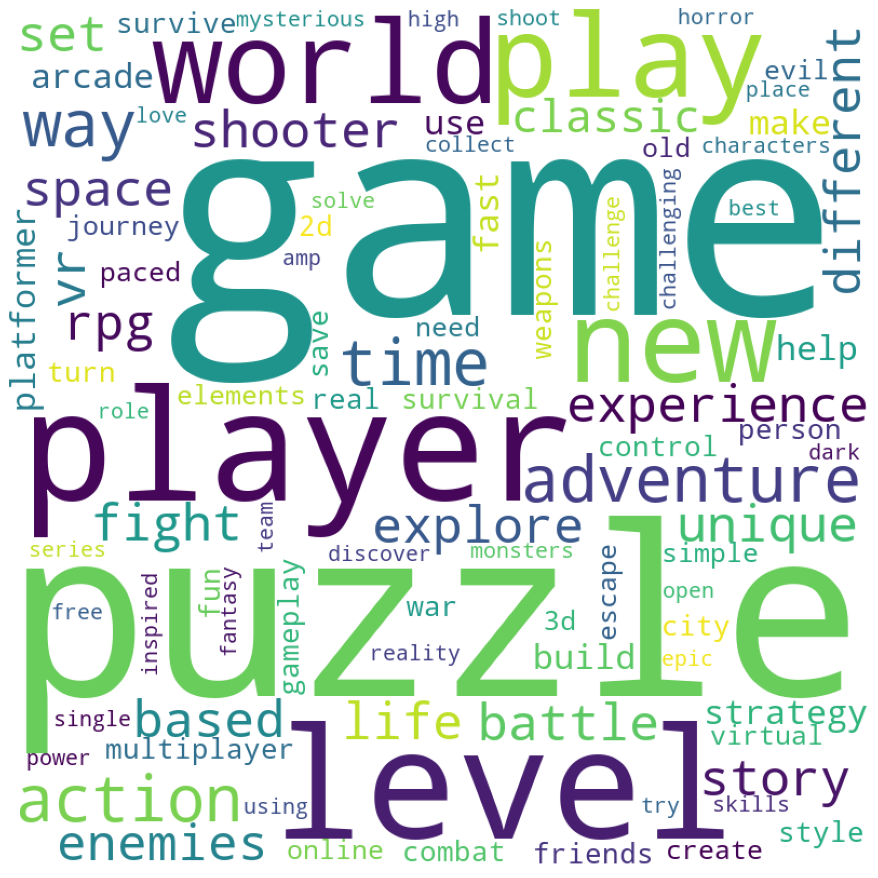

In [36]:
# create a word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_str)
 
# plot the word cloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()